In [1]:
import mediapipe as mp
import cv2
import sys
import math
import os
import csv
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
from pandas import Series
import glob
from tqdm import tqdm

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

C:\Users\bit\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\bit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def skel(file):

    #불러올 파일명
    cap = cv2.VideoCapture(file)
    #결과물을 집어넣을 폴더 생성
    # try:
    #     os.makedirs("FinalProject/CoordinateValues/%s" %file)
    #     os.makedirs("FinalProject/Result/%s" %file)
    # except:
    #     pass

    # #불러올 파일의 path설정
    # if file.split('_')[0] == 'half':
    #     cap = cv2.VideoCapture('FinalProject/half/%s.mp4' % file)
    # else:
    #     cap = cv2.VideoCapture('FinalProject/full/%s.mp4' % file)

    ### 엉덩이, 어깨, 무릎, 발목 좌표 집어넣을 리스트 생성
    
    R_WRIST = []    
    L_WRIST = []
    R_ELBOW = []
    L_ELBOW = []
    R_HIP = []
    L_HIP = []
    R_SHOULDER = []
    L_SHOULDER = []
    R_KNEE = []
    L_KNEE = []
    R_ANKLE = []
    L_ANKLE = []
    R_HEEL = []
    L_HEEL = []
    R_FOOT = []
    L_FOOT = []

    #영상 불러와서 실행
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        #영상이 실행중이거나 웹캠이 실행 중일 때
        while cap.isOpened():
            ret, frame = cap.read()
            if ret == False:
                break
            height, width, _ = frame.shape #frame의 세로, 가로를 각 변수에 입력
            w_h = width/height #실제 각도 측정할 때 필요
#             print(w_h)

            try:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            except:
                break
            #각 리스트에 생성된 좌표 값 입력
            results = holistic.process(image)
            R_WRIST.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])
            L_WRIST.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])
            R_ELBOW.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW])
            L_ELBOW.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW])
            R_HIP.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP])
            L_HIP.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP])
            R_SHOULDER.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER])
            L_SHOULDER.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER])
            R_KNEE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE])
            L_KNEE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE])
            R_ANKLE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ANKLE])
            L_ANKLE.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_ANKLE])
            R_HEEL.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HEEL])
            L_HEEL.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HEEL])
            R_FOOT.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_FOOT_INDEX])
            L_FOOT.append(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_FOOT_INDEX])
            
            squat_pose = []
            squat_pose_x = []
            squat_pose_y = []
            squat_pose_z = []
            
            for i in range(11, 17):
                squat_pose.append(results.pose_landmarks.landmark[i])

            for i in range(23, 33):
                squat_pose.append(results.pose_landmarks.landmark[i])

            for i in range(16):
                squat_pose_x.append(squat_pose[i].x)
                squat_pose_y.append(squat_pose[i].y)
                squat_pose_z.append(squat_pose[i].z)

            squat = pd.DataFrame({'x':squat_pose_x, 'y':squat_pose_y, 'z':squat_pose_z}, 
                         index=['R_SHOULDER', 'L_SHOULDER',
                                'R_ELBOW', 'L_ELBOW',
                                'R_WRIST', 'L_WRIST',
                                'R_HIP', 'L_HIP',
                                'R_KNEE', 'L_KNEE',
                                'R_ANKLE', 'L_ANKLE',
                                'R_HEEL', 'L_HEEL',
                                'R_FOOT', 'L_FOOT']).T
            print(squat)
            
            R_ARM_x_line = np.linspace(squat['R_SHOULDER']['x'], squat['R_ELBOW']['x'], 1000)
            R_ARM_y_line = np.linspace(squat['R_SHOULDER']['y'], squat['R_ELBOW']['y'], 1000)
            R_ARM_z_line = np.linspace(squat['R_SHOULDER']['z'], squat['R_ELBOW']['z'], 1000)
            
            R_ARM_2_x_line = np.linspace(squat['R_WRIST']['x'], squat['R_ELBOW']['x'], 1000)
            R_ARM_2_y_line = np.linspace(squat['R_WRIST']['y'], squat['R_ELBOW']['y'], 1000)
            R_ARM_2_z_line = np.linspace(squat['R_WRIST']['z'], squat['R_ELBOW']['z'], 1000)
            
            L_ARM_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['L_ELBOW']['x'], 1000)
            L_ARM_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['L_ELBOW']['y'], 1000)
            L_ARM_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['L_ELBOW']['z'], 1000)
            
            L_ARM_2_x_line = np.linspace(squat['L_WRIST']['x'], squat['L_ELBOW']['x'], 1000)
            L_ARM_2_y_line = np.linspace(squat['L_WRIST']['y'], squat['L_ELBOW']['y'], 1000)
            L_ARM_2_z_line = np.linspace(squat['L_WRIST']['z'], squat['L_ELBOW']['z'], 1000)
            
            SHOULDER_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['R_SHOULDER']['x'], 1000)
            SHOULDER_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['R_SHOULDER']['y'], 1000)
            SHOULDER_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['R_SHOULDER']['z'], 1000)

            HIP_x_line = np.linspace(squat['L_HIP']['x'], squat['R_HIP']['x'], 1000)
            HIP_y_line = np.linspace(squat['L_HIP']['y'], squat['R_HIP']['y'], 1000)
            HIP_z_line = np.linspace(squat['L_HIP']['z'], squat['R_HIP']['z'], 1000)

            L_TOP_x_line = np.linspace(squat['L_SHOULDER']['x'], squat['L_HIP']['x'], 1000)
            L_TOP_y_line = np.linspace(squat['L_SHOULDER']['y'], squat['L_HIP']['y'], 1000)
            L_TOP_z_line = np.linspace(squat['L_SHOULDER']['z'], squat['L_HIP']['z'], 1000)

            R_TOP_x_line = np.linspace(squat['R_SHOULDER']['x'], squat['R_HIP']['x'], 1000)
            R_TOP_y_line = np.linspace(squat['R_SHOULDER']['y'], squat['R_HIP']['y'], 1000)
            R_TOP_z_line = np.linspace(squat['R_SHOULDER']['z'], squat['R_HIP']['z'], 1000)

            L_MIDDLE_1_x_line = np.linspace(squat['L_HIP']['x'], squat['L_KNEE']['x'], 1000)
            L_MIDDLE_1_y_line = np.linspace(squat['L_HIP']['y'], squat['L_KNEE']['y'], 1000)
            L_MIDDLE_1_z_line = np.linspace(squat['L_HIP']['z'], squat['L_KNEE']['z'], 1000)

            R_MIDDLE_1_x_line = np.linspace(squat['R_HIP']['x'], squat['R_KNEE']['x'], 1000)
            R_MIDDLE_1_y_line = np.linspace(squat['R_HIP']['y'], squat['R_KNEE']['y'], 1000)
            R_MIDDLE_1_z_line = np.linspace(squat['R_HIP']['z'], squat['R_KNEE']['z'], 1000)

            L_MIDDLE_2_x_line = np.linspace(squat['L_KNEE']['x'], squat['L_ANKLE']['x'], 1000)
            L_MIDDLE_2_y_line = np.linspace(squat['L_KNEE']['y'], squat['L_ANKLE']['y'], 1000)
            L_MIDDLE_2_z_line = np.linspace(squat['L_KNEE']['z'], squat['L_ANKLE']['z'], 1000)

            R_MIDDLE_2_x_line = np.linspace(squat['R_KNEE']['x'], squat['R_ANKLE']['x'], 1000)
            R_MIDDLE_2_y_line = np.linspace(squat['R_KNEE']['y'], squat['R_ANKLE']['y'], 1000)
            R_MIDDLE_2_z_line = np.linspace(squat['R_KNEE']['z'], squat['R_ANKLE']['z'], 1000)

            L_BOTTOM_x_line = np.linspace(squat['L_HEEL']['x'], squat['L_FOOT']['x'], 1000)
            L_BOTTOM_y_line = np.linspace(squat['L_HEEL']['y'], squat['L_FOOT']['y'], 1000)
            L_BOTTOM_z_line = np.linspace(squat['L_HEEL']['z'], squat['L_FOOT']['z'], 1000)

            R_BOTTOM_x_line = np.linspace(squat['R_HEEL']['x'], squat['R_FOOT']['x'], 1000)
            R_BOTTOM_y_line = np.linspace(squat['R_HEEL']['y'], squat['R_FOOT']['y'], 1000)
            R_BOTTOM_z_line = np.linspace(squat['R_HEEL']['z'], squat['R_FOOT']['z'], 1000)
            
            L_BOTTOM_2_x_line = np.linspace(squat['L_FOOT']['x'], squat['L_ANKLE']['x'], 1000)
            L_BOTTOM_2_y_line = np.linspace(squat['L_FOOT']['y'], squat['L_ANKLE']['y'], 1000)
            L_BOTTOM_2_z_line = np.linspace(squat['L_FOOT']['z'], squat['L_ANKLE']['z'], 1000)

            R_BOTTOM_2_x_line = np.linspace(squat['R_FOOT']['x'], squat['R_ANKLE']['x'], 1000)
            R_BOTTOM_2_y_line = np.linspace(squat['R_FOOT']['y'], squat['R_ANKLE']['y'], 1000)
            R_BOTTOM_2_z_line = np.linspace(squat['R_FOOT']['z'], squat['R_ANKLE']['z'], 1000)
            
            x_max = max(squat.T.x)
            x_min = min(squat.T.x)
            x = (x_max + x_min)/3

            y_max = max(squat.T.y)
            y_min = min(squat.T.y)
            y = (y_max + y_min) /10

            z_max = max(squat.T.z)
            z_min = min(squat.T.z)
            z = (z_max - z_min)

            fig = plt.figure()
            #create data for 3d line
            #3d container
            ax = plt.axes(projection = '3d')


            plt.ylim(0, 1)
            ax.set_zlim(0, 1*w_h)#실제 각도 측정할 때 필요
#             plt.xlim(x_min, x_max)

            ax.plot3D(R_ARM_z_line, R_ARM_x_line, R_ARM_y_line, linewidth=1.0)
            ax.plot3D(L_ARM_z_line, L_ARM_x_line, L_ARM_y_line, linewidth=1.0)
            ax.plot3D(R_ARM_2_z_line, R_ARM_2_x_line, R_ARM_2_y_line, linewidth=1.0)
            ax.plot3D(L_ARM_2_z_line, L_ARM_2_x_line, L_ARM_2_y_line, linewidth=1.0)
            ax.plot3D(SHOULDER_z_line, SHOULDER_x_line, SHOULDER_y_line, linewidth=1.0)
            ax.plot3D(HIP_z_line, HIP_x_line, HIP_y_line, linewidth=1.0)
            ax.plot3D(L_TOP_z_line, L_TOP_x_line, L_TOP_y_line, linewidth=1.0)
            ax.plot3D(R_TOP_z_line, R_TOP_x_line, R_TOP_y_line, linewidth=1.0)
            ax.plot3D(L_MIDDLE_1_z_line, L_MIDDLE_1_x_line, L_MIDDLE_1_y_line, linewidth=1.0)
            ax.plot3D(R_MIDDLE_1_z_line, R_MIDDLE_1_x_line, R_MIDDLE_1_y_line, linewidth=1.0)
            ax.plot3D(L_MIDDLE_2_z_line, L_MIDDLE_2_x_line, L_MIDDLE_2_y_line, linewidth=1.0)
            ax.plot3D(R_MIDDLE_2_z_line, R_MIDDLE_2_x_line, R_MIDDLE_2_y_line, linewidth=1.0)
            #ax.plot3D(L_BOTTOM_z_line, L_BOTTOM_x_line, L_BOTTOM_y_line, linewidth=5.0)
            #ax.plot3D(R_BOTTOM_z_line, R_BOTTOM_x_line, R_BOTTOM_y_line, linewidth=5.0)
            #ax.plot3D(L_BOTTOM_2_z_line, L_BOTTOM_2_x_line, L_BOTTOM_2_y_line, linewidth=5.0)
            #ax.plot3D(R_BOTTOM_2_z_line, R_BOTTOM_2_x_line, R_BOTTOM_2_y_line, linewidth=5.0)
            ax.grid(False)
            ax.set_axis_off()

            ax.view_init(elev=180, azim=0)
            plt.savefig('D:/image_test/%s.jpg'%file.split('\\')[-1].split('.')[0])
#             plt.close()

            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # 이미지 위에 좌표값 출력 파트
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=4, circle_radius=2),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=4, circle_radius=2))
#             #스켈레톤화 된 영상 출력                
            cv2.imshow('Raw Webcam Feed', image)
            cv2.imwrite('images/%s_sub.jpg'%file.split('.')[0], image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

 
    cap.release()
    cv2.destroyAllWindows()

In [25]:
img = cv2.imread('D:/test2/backimage.jpg', cv2.IMREAD_COLOR)

In [26]:
cv2.imshow('show',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

   R_SHOULDER  L_SHOULDER   R_ELBOW   L_ELBOW   R_WRIST   L_WRIST     R_HIP  \
x    0.559640    0.547928  0.400952  0.409152  0.268919  0.281243  0.708616   
y    0.307693    0.300752  0.311053  0.313498  0.305992  0.302021  0.543630   
z   -0.301143    0.196807 -0.408939  0.235331 -0.374592  0.136313 -0.164548   

      L_HIP    R_KNEE    L_KNEE   R_ANKLE   L_ANKLE    R_HEEL    L_HEEL  \
x  0.685211  0.487991  0.485866  0.579899  0.560614  0.612067  0.594057   
y  0.529430  0.603634  0.586968  0.814572  0.773529  0.850391  0.813643   
z  0.164722 -0.213435  0.131092 -0.054968  0.280731 -0.038744  0.293554   

     R_FOOT    L_FOOT  
x  0.491494  0.485620  
y  0.852279  0.815430  
z -0.049940  0.279655  


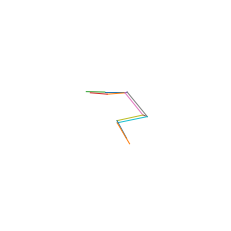

In [4]:
skel('D:/test2\\png-clipart-squat-exercise-plank-weight-loss-thigh-squat-physical-fitness-weight-loss-thumbnail.jpg')

In [96]:
test = glob.glob('images/*')

In [97]:
test

['images\\1048131856_sub.jpg',
 'images\\2017121101534_0_sub.jpg',
 'images\\depositphotos_202234670-stock-photo-side-view-relaxed-casual-man_sub.jpg',
 'images\\Depositphotos_9001836_l-2015.jpg',
 'images\\full_5_sub.jpg',
 'images\\gettyimages-1042508960-612x612_sub.jpg',
 'images\\istockphoto-900100556-1024x1024_sub.jpg',
 'images\\Plank-Workout-Thumbnail.jpg',
 'images\\Screen-Shot-2017-06-22-at-3_sub.jpg',
 'images\\Squat_3_sub.jpg',
 'images\\Squat_sub.jpg',
 'images\\squat_sub_2.jpg',
 'images\\squat_sub_3.jpg',
 'images\\洹몃┝01_sub.jpg']

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.60it/s]


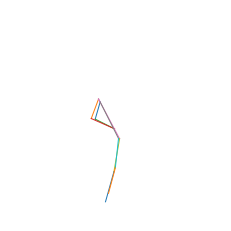

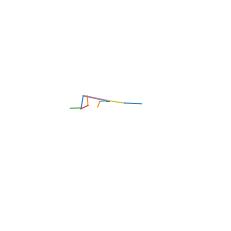

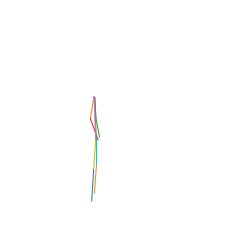

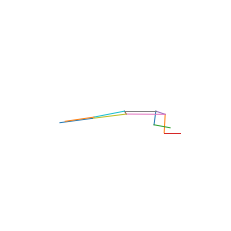

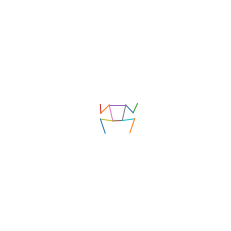

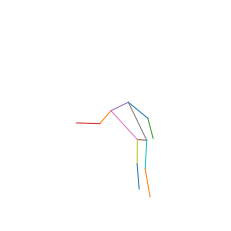

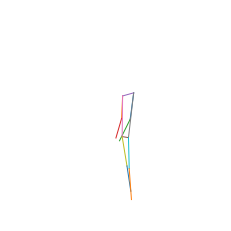

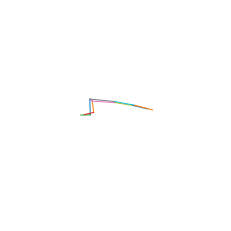

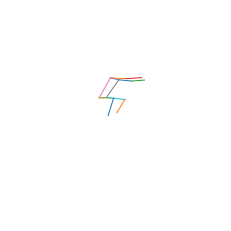

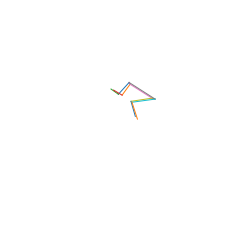

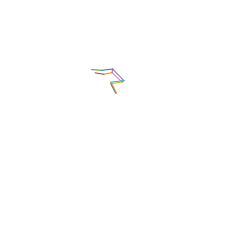

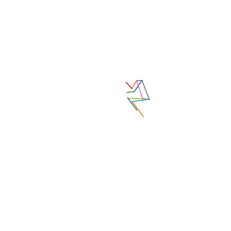

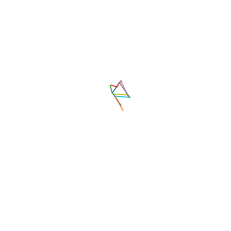

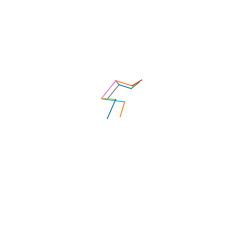

In [98]:
for i in tqdm(range(len(test))):
    try:
        skel(test[i])
    except:
        pass

In [3]:
squat = glob.glob('D:/squat/*')

In [4]:
len(squat)

2038

In [5]:
plank = glob.glob('D:/plank/*')

In [6]:
len(plank)

1230

In [11]:
stand = glob.glob('D:/stand/*')

In [12]:
len(stand)

1229

In [9]:
for i in tqdm(range(len(squat))):
    skel(squat[i])

 64%|██████████████████████████████████████████████████                            | 1307/2038 [09:20<05:13,  2.33it/s]


KeyboardInterrupt: 

In [9]:
plank_bad_img = []
for i in tqdm(range(len(plank))):
    try:
        skel(plank[i])
    except:
        plank_bad_img.append(plank[i])
        pass

100%|██████████████████████████████████████████████████████████████████████████████| 1230/1230 [09:04<00:00,  2.26it/s]


In [ ]:
stand_bad_img = []
for i in tqdm(range(len(stand))):
    try:
        skel(stand[i])
    except:
        stand_bad_img.append(stand[i])
        pass

 11%|████████▉                                                                      | 139/1229 [01:09<09:48,  1.85it/s]